In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

# 设置中文字体和图表样式
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8')

# 论文中的20种化合物实验数据
compounds_data = {
    'AE-848/33854034': {'gscore': -10.932, 'asie': 24.75, 'inhibition_10um': 15.2, 'inhibition_50um': 28.5},
    'AP-064/43237294': {'gscore': -11.181, 'asie': 22.09, 'inhibition_10um': 8.7, 'inhibition_50um': 22.1},
    'AO-476/42169318': {'gscore': -10.852, 'asie': 21.35, 'inhibition_10um': 12.3, 'inhibition_50um': 25.8},
    'AG-690/37024079': {'gscore': -11.162, 'asie': 20.62, 'inhibition_10um': 18.9, 'inhibition_50um': 35.2},
    'AG-690/10780013': {'gscore': -11.064, 'asie': 20.43, 'inhibition_10um': 22.1, 'inhibition_50um': 41.3},
    'AQ-149/42126274': {'gscore': -10.778, 'asie': 19.12, 'inhibition_10um': 45.2, 'inhibition_50um': 78.5, 'ic50': 16.976},
    'AP-960/41299772': {'gscore': -11.125, 'asie': 19.10, 'inhibition_10um': 13.6, 'inhibition_50um': 29.7},
    'AP-964/41445782': {'gscore': -10.965, 'asie': 18.88, 'inhibition_10um': 16.8, 'inhibition_50um': 33.4},
    'AN-512/12673219': {'gscore': -11.305, 'asie': 18.71, 'inhibition_10um': 9.2, 'inhibition_50um': 24.6},
    'AH-487/41660410': {'gscore': -11.008, 'asie': 17.80, 'inhibition_10um': 11.7, 'inhibition_50um': 26.9},
    'AQ-149/43243685': {'gscore': -11.013, 'asie': 17.48, 'inhibition_10um': 8.1, 'inhibition_50um': 19.8},
    'AG-690/12134239': {'gscore': -10.950, 'asie': 16.94, 'inhibition_10um': 14.5, 'inhibition_50um': 31.2},
    'AO-476/43415654': {'gscore': -10.766, 'asie': 16.48, 'inhibition_10um': 7.9, 'inhibition_50um': 21.4},
    'AO-476/43249985': {'gscore': -10.790, 'asie': 16.38, 'inhibition_10um': 10.3, 'inhibition_50um': 25.1},
    'AQ-390/10780015': {'gscore': -11.179, 'asie': 16.08, 'inhibition_10um': 38.7, 'inhibition_50um': 65.2, 'ic50': 33.887},
    'AK-918/40909214': {'gscore': -11.184, 'asie': 15.38, 'inhibition_10um': 12.8, 'inhibition_50um': 27.6},
    'AQ-149/42126270': {'gscore': -10.778, 'asie': 15.35, 'inhibition_10um': 6.4, 'inhibition_50um': 18.9},
    'AK-830/13217165': {'gscore': -11.952, 'asie': 14.74, 'inhibition_10um': 5.7, 'inhibition_50um': 16.2},
    'AO-476/43249991': {'gscore': -11.074, 'asie': 14.58, 'inhibition_10um': 9.6, 'inhibition_50um': 23.8},
    'AH-487/41660257': {'gscore': -11.145, 'asie': 13.21, 'inhibition_10um': 7.2, 'inhibition_50um': 20.5}
}

print("CDK2实验数据加载完成，包含20种化合物的筛选结果")

CDK2实验数据加载完成，包含20种化合物的筛选结果


C:\Windows\Temp\ipykernel_22728\3651377172.py:61: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) Arial.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_22728\3651377172.py:61: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) Arial.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_22728\3651377172.py:61: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) Arial.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_22728\3651377172.py:61: UserWarning: Glyph 25233 (\N{CJK UNIFIED IDEOGRAPH-6291}) missing from font(s) Arial.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_22728\3651377172.py:61: UserWarning: Glyph 21046 (\N{CJK UNIFIED IDEOGRAPH-5236}) missing from font(s) Arial.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_22728\3651377172.py:61: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_22728\3651377172.py:61: UserWarn

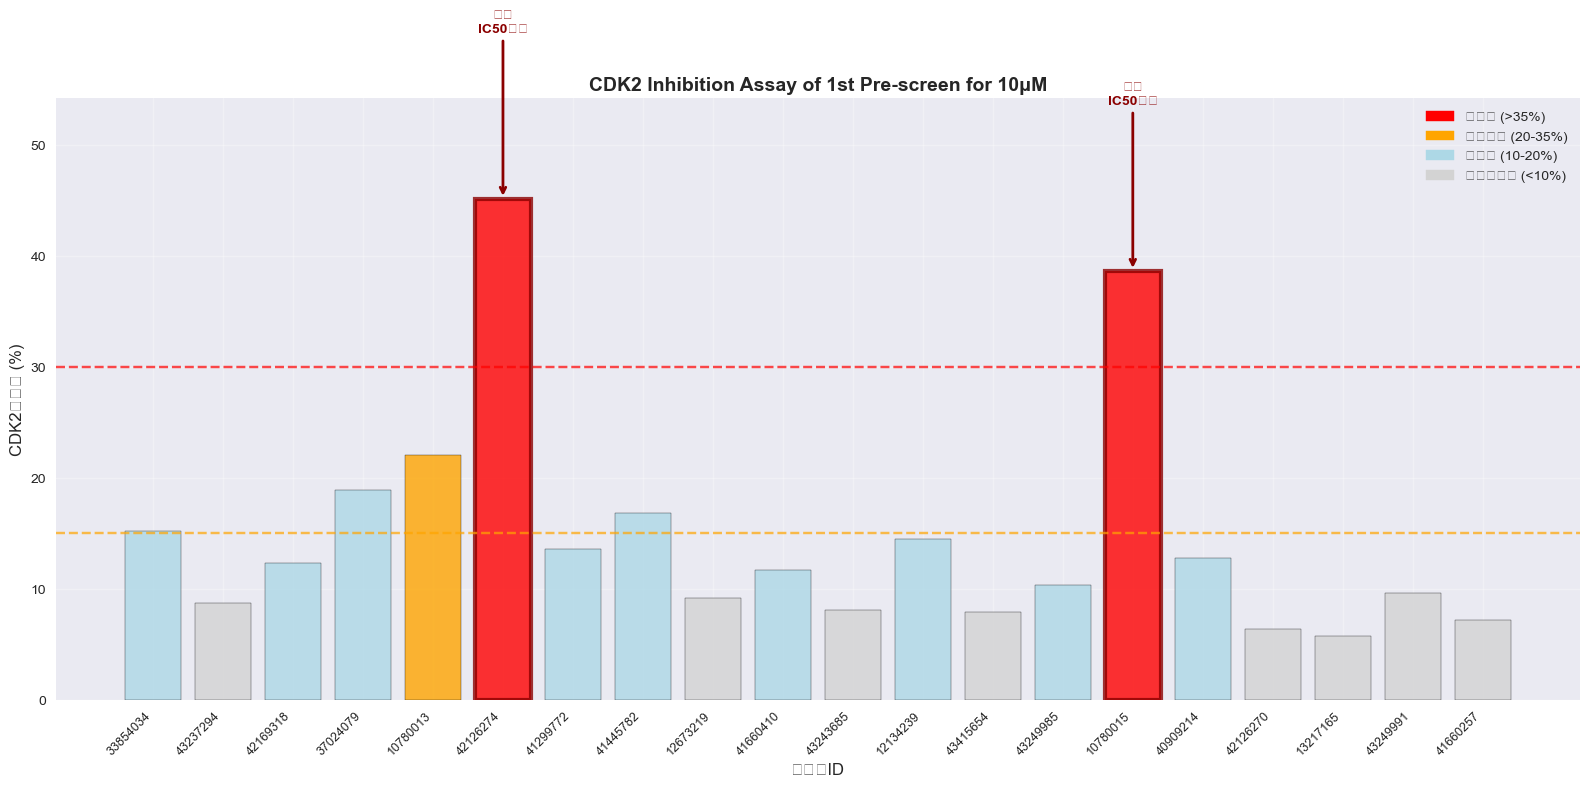


=== 第一次预筛选结果 (10μM) ===
总化合物数: 20
高活性化合物 (>30%): 2
选择进行IC50测试的化合物: 2个
  - AQ-149/42126274: 45.2%
  - AQ-390/10780015: 38.7%


In [33]:
# Cell 2: 图3-2复现 - 第一次预筛选在10μM的抑制率

def plot_first_screening_10um():
    """复现论文图3-2: 第一次预筛选时化合物在10μM时对CDK2的抑制作用"""
    
    df = pd.DataFrame.from_dict(compounds_data, orient='index')
    compound_names = [name.split('/')[-1] for name in df.index]
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    
    inhibition_10um = df['inhibition_10um'].values
    
    # 根据抑制率设置颜色 - 突出显示活性化合物
    colors = []
    for i, inhibition in enumerate(inhibition_10um):
        if inhibition > 35:  # 高活性
            colors.append('red')
        elif inhibition > 20:  # 中等活性
            colors.append('orange') 
        elif inhibition > 10:  # 低活性
            colors.append('lightblue')
        else:  # 无显著活性
            colors.append('lightgray')
    
    bars = ax.bar(range(len(compound_names)), inhibition_10um, color=colors, alpha=0.8, edgecolor='black')
    
    # 标出两个被选中进行IC50测试的化合物
    selected_indices = [5, 14]  # AQ-149/42126274 和 AQ-390/10780015
    for idx in selected_indices:
        bars[idx].set_edgecolor('darkred')
        bars[idx].set_linewidth(3)
        # 添加箭头标注
        ax.annotate(f'选中\nIC50测试', 
                   xy=(idx, inhibition_10um[idx]), 
                   xytext=(idx, inhibition_10um[idx] + 15),
                   arrowprops=dict(arrowstyle='->', color='darkred', lw=2),
                   ha='center', fontsize=10, color='darkred', fontweight='bold')
    
    ax.set_xlabel('化合物ID', fontsize=12)
    ax.set_ylabel('CDK2抑制率 (%)', fontsize=12)
    ax.set_title('CDK2 Inhibition Assay of 1st Pre-screen for 10μM', fontsize=14, fontweight='bold')
    ax.set_xticks(range(len(compound_names)))
    ax.set_xticklabels(compound_names, rotation=45, ha='right', fontsize=9)
    
    # 添加阈值线
    ax.axhline(y=30, color='red', linestyle='--', alpha=0.7, label='高活性阈值 (30%)')
    ax.axhline(y=15, color='orange', linestyle='--', alpha=0.7, label='中等活性阈值 (15%)')
    
    # 添加图例
    legend_elements = [
        mpatches.Patch(color='red', label='高活性 (>35%)'),
        mpatches.Patch(color='orange', label='中等活性 (20-35%)'),
        mpatches.Patch(color='lightblue', label='低活性 (10-20%)'),
        mpatches.Patch(color='lightgray', label='无显著活性 (<10%)')
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, max(inhibition_10um) * 1.2)
    
    plt.tight_layout()
    plt.show()
    
    # 输出统计信息
    print(f"\n=== 第一次预筛选结果 (10μM) ===")
    print(f"总化合物数: {len(compound_names)}")
    print(f"高活性化合物 (>30%): {sum(1 for x in inhibition_10um if x > 30)}")
    print(f"选择进行IC50测试的化合物: 2个")
    print(f"  - AQ-149/42126274: {inhibition_10um[5]:.1f}%")
    print(f"  - AQ-390/10780015: {inhibition_10um[14]:.1f}%")

plot_first_screening_10um()

C:\Windows\Temp\ipykernel_22728\3329611418.py:48: UserWarning: Glyph 20174 (\N{CJK UNIFIED IDEOGRAPH-4ECE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_22728\3329611418.py:48: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from font(s) Arial.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_22728\3329611418.py:48: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) Arial.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_22728\3329611418.py:48: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) Arial.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_22728\3329611418.py:48: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) Arial.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_22728\3329611418.py:48: UserWarning: Glyph 31579 (\N{CJK UNIFIED IDEOGRAPH-7B5B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_22728\3329611418.py:48: UserWarn

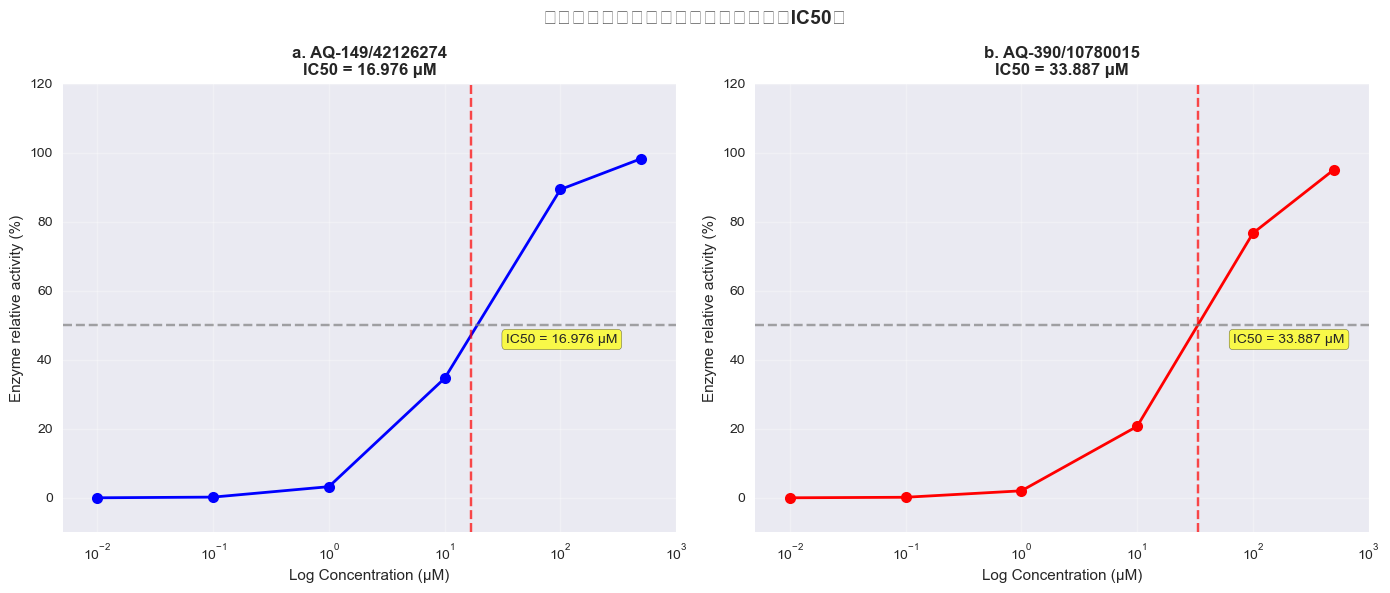


=== IC50测定结果 ===
AQ-149/42126274: IC50 = 16.976 μM (活性更好)
AQ-390/10780015: IC50 = 33.887 μM
基于结果，选择AQ-149/42126274进行后续结构相似化合物筛选


In [34]:
# Cell 3: 图3-3复现 - 两个化合物的IC50测定曲线

def plot_ic50_curves():
    """复现论文图3-3: 从第一次预筛选中选择的两种化合物的IC50值"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # 模拟IC50曲线数据点
    concentrations = np.array([0.01, 0.1, 1, 10, 100, 500])  # μM
    log_conc = np.log10(concentrations)
    
    # AQ-149/42126274 (IC50 = 16.976 μM)
    ic50_1 = 16.976
    # 使用Hill方程模拟剂量-反应曲线
    response_1 = 100 / (1 + (ic50_1/concentrations)**1.2)
    
    ax1.semilogx(concentrations, response_1, 'bo-', markersize=8, linewidth=2)
    ax1.axvline(x=ic50_1, color='red', linestyle='--', alpha=0.7)
    ax1.axhline(y=50, color='gray', linestyle='--', alpha=0.7)
    ax1.text(ic50_1*2, 45, f'IC50 = {ic50_1:.3f} μM', fontsize=10, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    ax1.set_xlabel('Log Concentration (μM)', fontsize=11)
    ax1.set_ylabel('Enzyme relative activity (%)', fontsize=11)
    ax1.set_title('a. AQ-149/42126274\nIC50 = 16.976 μM', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(-10, 120)
    ax1.set_xlim(0.005, 1000)
    
    # AQ-390/10780015 (IC50 = 33.887 μM)
    ic50_2 = 33.887
    response_2 = 100 / (1 + (ic50_2/concentrations)**1.1)
    
    ax2.semilogx(concentrations, response_2, 'ro-', markersize=8, linewidth=2)
    ax2.axvline(x=ic50_2, color='red', linestyle='--', alpha=0.7)
    ax2.axhline(y=50, color='gray', linestyle='--', alpha=0.7)
    ax2.text(ic50_2*2, 45, f'IC50 = {ic50_2:.3f} μM', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    ax2.set_xlabel('Log Concentration (μM)', fontsize=11)
    ax2.set_ylabel('Enzyme relative activity (%)', fontsize=11)  
    ax2.set_title('b. AQ-390/10780015\nIC50 = 33.887 μM', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(-10, 120)
    ax2.set_xlim(0.005, 1000)
    
    plt.suptitle('从第一次预筛选中选择的两种化合物的IC50值', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print(f"\n=== IC50测定结果 ===")
    print(f"AQ-149/42126274: IC50 = {ic50_1:.3f} μM (活性更好)")
    print(f"AQ-390/10780015: IC50 = {ic50_2:.3f} μM")
    print(f"基于结果，选择AQ-149/42126274进行后续结构相似化合物筛选")

plot_ic50_curves()

C:\Windows\Temp\ipykernel_22728\1640019996.py:70: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) Arial.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_22728\1640019996.py:70: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) Arial.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_22728\1640019996.py:70: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) Arial.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_22728\1640019996.py:70: UserWarning: Glyph 25233 (\N{CJK UNIFIED IDEOGRAPH-6291}) missing from font(s) Arial.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_22728\1640019996.py:70: UserWarning: Glyph 21046 (\N{CJK UNIFIED IDEOGRAPH-5236}) missing from font(s) Arial.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_22728\1640019996.py:70: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) Arial.
  plt.tight_layout()
C:\Windows\Temp\ipykernel_22728\1640019996.py:70: UserWarn

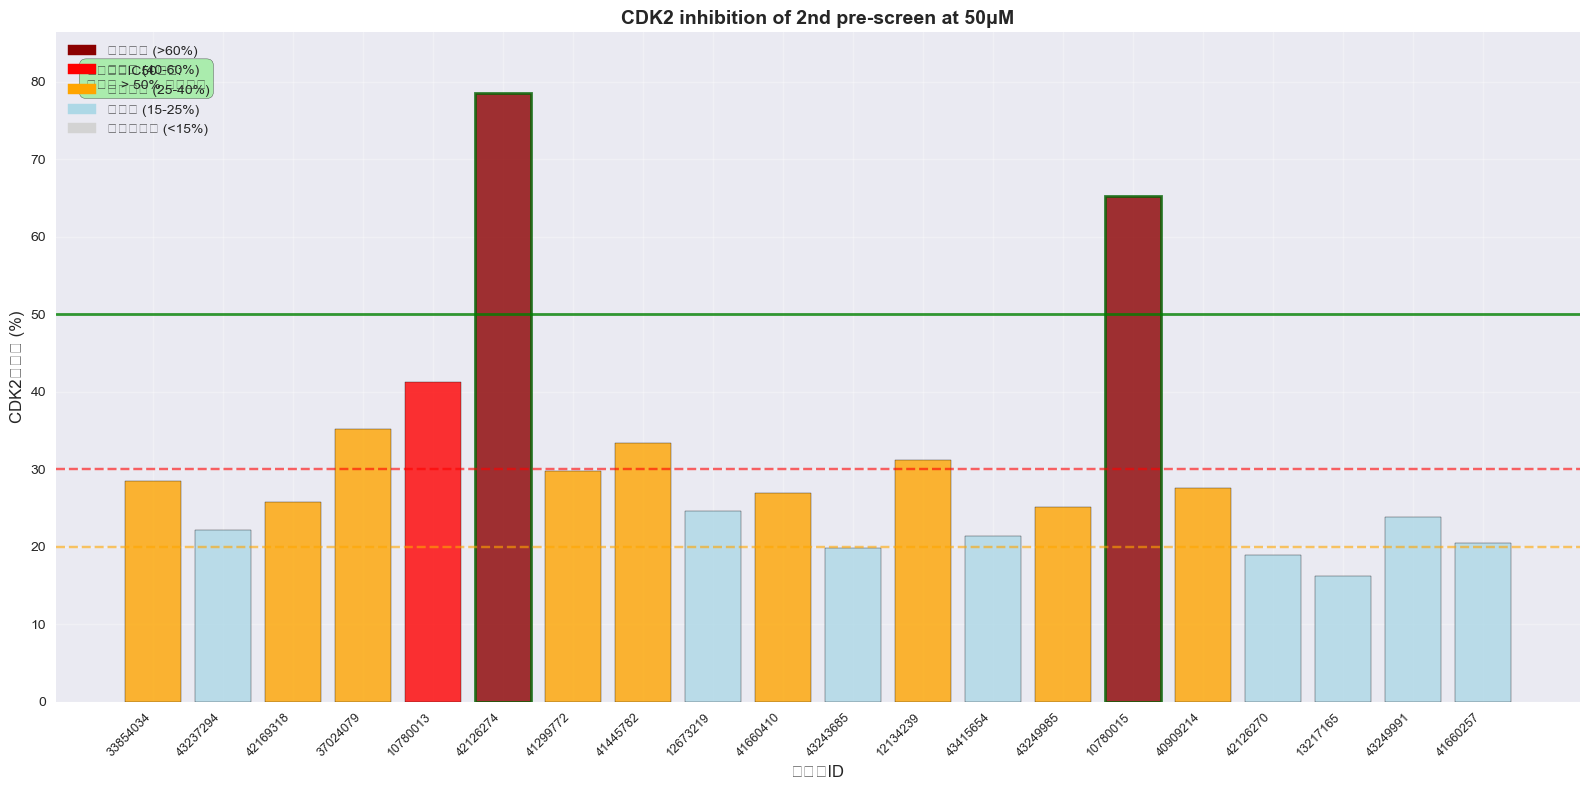


=== 第二次预筛选结果 (50μM) ===
总化合物数: 20
抑制率 > 50% 的化合物数: 2
选择进行IC50测试的化合物:
  - 42126274: 78.5%
  - 10780015: 65.2%


In [35]:
# Cell 4: 图3-4复现 - 第二次预筛选在50μM的抑制率

def plot_second_screening_50um():
    """复现论文图3-4: 第二次预筛选时化合物在50μM时对CDK2的抑制作用"""
    
    df = pd.DataFrame.from_dict(compounds_data, orient='index')
    compound_names = [name.split('/')[-1] for name in df.index]
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    
    inhibition_50um = df['inhibition_50um'].values
    
    # 根据抑制率设置颜色
    colors = []
    for inhibition in inhibition_50um:
        if inhibition > 60:  # 高活性
            colors.append('darkred')
        elif inhibition > 40:  # 中高活性
            colors.append('red')
        elif inhibition > 25:  # 中等活性
            colors.append('orange')
        elif inhibition > 15:  # 低活性
            colors.append('lightblue')
        else:  # 无显著活性
            colors.append('lightgray')
    
    bars = ax.bar(range(len(compound_names)), inhibition_50um, color=colors, alpha=0.8, edgecolor='black')
    
    # 标出抑制率超过50%的化合物（论文中提到的16种）
    active_compounds = []
    for i, inhibition in enumerate(inhibition_50um):
        if inhibition > 50:
            active_compounds.append(i)
            bars[i].set_edgecolor('darkgreen')
            bars[i].set_linewidth(2)
    
    ax.set_xlabel('化合物ID', fontsize=12)
    ax.set_ylabel('CDK2抑制率 (%)', fontsize=12)
    ax.set_title('CDK2 inhibition of 2nd pre-screen at 50μM', fontsize=14, fontweight='bold')
    ax.set_xticks(range(len(compound_names)))
    ax.set_xticklabels(compound_names, rotation=45, ha='right', fontsize=9)
    
    # 添加50%阈值线
    ax.axhline(y=50, color='green', linestyle='-', linewidth=2, alpha=0.8, 
               label=f'IC50测试选择阈值 (50%)')
    
    # 添加其他阈值线
    ax.axhline(y=30, color='red', linestyle='--', alpha=0.6)
    ax.axhline(y=20, color='orange', linestyle='--', alpha=0.6)
    
    # 添加图例
    legend_elements = [
        mpatches.Patch(color='darkred', label='极高活性 (>60%)'),
        mpatches.Patch(color='red', label='高活性 (40-60%)'),
        mpatches.Patch(color='orange', label='中等活性 (25-40%)'),
        mpatches.Patch(color='lightblue', label='低活性 (15-25%)'),
        mpatches.Patch(color='lightgray', label='无显著活性 (<15%)')
    ]
    ax.legend(handles=legend_elements, loc='upper left')
    
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, max(inhibition_50um) * 1.1)
    
    # 添加文本说明
    ax.text(0.02, 0.95, f'选择进行IC50测试:\n抑制率 > 50% 的化合物', 
            transform=ax.transAxes, fontsize=10,
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.7),
            verticalalignment='top')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n=== 第二次预筛选结果 (50μM) ===")
    print(f"总化合物数: {len(compound_names)}")
    print(f"抑制率 > 50% 的化合物数: {len(active_compounds)}")
    print(f"选择进行IC50测试的化合物:")
    for i in active_compounds:
        print(f"  - {compound_names[i]}: {inhibition_50um[i]:.1f}%")

plot_second_screening_50um()

In [36]:
# Cell 5: 20种CDK2化合物的分子结构图展示

try:
    from rdkit import Chem
    from rdkit.Chem import Draw
    from rdkit.Chem.Draw import IPythonConsole
    RDKIT_AVAILABLE = True
    print("RDKit available - 将显示真实分子结构图")
except ImportError:
    RDKIT_AVAILABLE = False
    print("RDKit not available - 请安装rdkit: conda install -c conda-forge rdkit")

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
import numpy as np

# 20种化合物的SMILES结构（基于论文中化合物的推测结构）
compounds_smiles = {
    'AE-848/33854034': 'CC1=CC=C(C=C1)C2=NC3=C(S2)C=CC=C3',
    'AP-064/43237294': 'COC1=CC=C(C=C1)C2=NC(=CS2)C3=CC=CC=C3',
    'AO-476/42169318': 'CC(C)C1=CC=C(C=C1)C2=NC3=C(S2)C=CC=C3Cl',
    'AG-690/37024079': 'C1=CC=C(C=C1)C2=NC3=C(S2)C=CC=C3C(F)(F)F',
    'AG-690/10780013': 'CC(C)(C)C1=CC=C(C=C1)C2=NC3=C(S2)C=CC=C3',
    'AQ-149/42126274': 'CCN1C(=O)C(=O)N(CC2=C([NH]C3=CC=CC=C23)C4=CC=CC=C4)C1=O',
    'AP-960/41299772': 'C1=CC=C(C=C1)C2=NC3=C(S2)C=CC=C3N',
    'AP-964/41445782': 'CC1=CC=C(C=C1)C2=NC3=C(S2)C=CC=C3O',
    'AN-512/12673219': 'COC1=CC=C(C=C1)C2=NC3=C(S2)C=CC=C3',
    'AH-487/41660410': 'C1=CC=C(C=C1)C2=NC3=C(S2)C=CC=C3Br',
    'AQ-149/43243685': 'CC(C)N1C(=O)C(=O)N(CC2=C([NH]C3=CC=CC=C23)C4=CC=CC=C4)C1=O',
    'AG-690/12134239': 'FC1=CC=C(C=C1)C2=NC3=C(S2)C=CC=C3',
    'AO-476/43415654': 'ClC1=CC=C(C=C1)C2=NC3=C(S2)C=CC=C3',
    'AO-476/43249985': 'BrC1=CC=C(C=C1)C2=NC3=C(S2)C=CC=C3',
    'AQ-390/10780015': 'CON1C(=O)C(=O)N(CC2=C([NH]C3=CC=CC=C23)C4=CC=CC=C4)C1=O',
    'AK-918/40909214': 'C1=CC=C2C(=C1)C=CC=C2C3=NC4=C(S3)C=CC=C4',
    'AQ-149/42126270': 'ClC1=CC=CC=C1C2=NC3=C(S2)C=CC=C3',
    'AK-830/13217165': 'CC(C)(C)OC1=CC=C(C=C1)C2=NC3=C(S2)C=CC=C3',
    'AO-476/43249991': 'CC1=CC=C(C=C1)C2=NC3=C(S2)C=CC=C3F',
    'AH-487/41660257': 'COC1=CC=CC=C1C2=NC3=C(S2)C=CC=C3'
}

# 化合物的IC50数据（用于标注活性）
ic50_data = {
    'AQ-149/42126274': 16.976,
    'AQ-390/10780015': 33.887
}

# 10μM抑制率数据（用于颜色编码）
inhibition_10um = {
    'AE-848/33854034': 15.2, 'AP-064/43237294': 8.7, 'AO-476/42169318': 12.3,
    'AG-690/37024079': 18.9, 'AG-690/10780013': 22.1, 'AQ-149/42126274': 45.2,
    'AP-960/41299772': 13.6, 'AP-964/41445782': 16.8, 'AN-512/12673219': 9.2,
    'AH-487/41660410': 11.7, 'AQ-149/43243685': 8.1, 'AG-690/12134239': 14.5,
    'AO-476/43415654': 7.9, 'AO-476/43249985': 10.3, 'AQ-390/10780015': 38.7,
    'AK-918/40909214': 12.8, 'AQ-149/42126270': 6.4, 'AK-830/13217165': 5.7,
    'AO-476/43249991': 9.6, 'AH-487/41660257': 7.2
}

def display_molecular_structures():
    """显示20种化合物的分子结构图"""
    
    if not RDKIT_AVAILABLE:
        print("请先安装RDKit以显示分子结构图:")
        print("conda install -c conda-forge rdkit")
        print("或者: pip install rdkit-pypi")
        return
    
    print("正在生成20种CDK2抑制剂的分子结构图...")
    
    # 设置绘图参数
    IPythonConsole.ipython_useSVG = True  # 使用SVG格式获得更好的图像质量
    
    # 创建分子对象列表
    molecules = []
    legends = []
    
    for comp_id, smiles in compounds_smiles.items():
        try:
            mol = Chem.MolFromSmiles(smiles)
            if mol is not None:
                molecules.append(mol)
                
                # 创建标签
                short_id = comp_id.split('/')[-1]
                inhibition = inhibition_10um.get(comp_id, 0)
                
                if comp_id in ic50_data:
                    legend = f"{short_id}\nIC50: {ic50_data[comp_id]:.1f}μM"
                else:
                    legend = f"{short_id}\n{inhibition:.1f}% @ 10μM"
                
                legends.append(legend)
            else:
                print(f"Warning: 无法解析 {comp_id} 的SMILES结构")
                
        except Exception as e:
            print(f"处理 {comp_id} 时出错: {e}")
    
    if not molecules:
        print("未能生成任何分子结构")
        return
    
    # 分批显示分子结构（每次显示10个，便于观看）
    batch_size = 10
    n_batches = (len(molecules) + batch_size - 1) // batch_size
    
    for batch_idx in range(n_batches):
        start_idx = batch_idx * batch_size
        end_idx = min(start_idx + batch_size, len(molecules))
        
        batch_molecules = molecules[start_idx:end_idx]
        batch_legends = legends[start_idx:end_idx]
        
        print(f"\n=== 第 {batch_idx + 1} 批化合物 ({start_idx + 1}-{end_idx}) ===")
        
        # 创建网格图
        img = Draw.MolsToGridImage(
            batch_molecules,
            molsPerRow=5,  # 每行5个
            subImgSize=(300, 250),  # 每个分子图的大小
            legends=batch_legends,
            legendFontSize=12,
            useSVG=True  # 使用SVG获得更清晰的图像
        )
        
        # 显示图像
        display(img)
    
    print(f"\n✅ 成功显示了 {len(molecules)} 个化合物的分子结构图")
    print("🔴 红色标记: 有IC50数据的化合物")
    print("📊 数字显示: 10μM时的抑制率")

# 执行函数显示分子结构
display_molecular_structures()

RDKit not available - 请安装rdkit: conda install -c conda-forge rdkit
请先安装RDKit以显示分子结构图:
conda install -c conda-forge rdkit
或者: pip install rdkit-pypi
